Our project is based on recognizing whether there is a dog or cat in the picture.

Nasz projekt polega na rozpoznaniu, czy na obrazku znajduje się pies czy kot.

The data is taken from here: https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition


Import all the main libraries we need during the project.

Importujemy wszystkie główne biblioteki, których będziemy potrzebować w projekcie.

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.preprocessing.image import load_img, img_to_array

Loading the names of image files.

Wczytywanie nazw plików graficznych.

In [2]:

import os


img_dir = r'C:\Users\sofia\Desktop\Python\DATA\train'
images = os.listdir(img_dir)
images[:3]


['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg']

Making full path for each of the image.

Utworzenie pełnej ścieżki dla każdego z obrazów.

In [3]:

full_images = [os.path.join(img_dir, img) for img in images]
full_images[:3]

['C:\\Users\\sofia\\Desktop\\Python\\DATA\\train\\cat.0.jpg',
 'C:\\Users\\sofia\\Desktop\\Python\\DATA\\train\\cat.1.jpg',
 'C:\\Users\\sofia\\Desktop\\Python\\DATA\\train\\cat.10.jpg']

Creating a function for showing rgb layers.

Tworzenie funkcji do pokazywania warstw rgb.

In [4]:


def show_rgb_layers(image, subplots_args=dict()):
    
    im_shape = image.shape
    
#Checking if the loaded image has 3 dimensions
#Sprawdzanie, czy załadowany obraz ma 3 wymiary
    assert image.ndim == 3
#Checking whether the last dimension of im_shape has 3 dimensions
#Sprawdzanie, czy ostatni wymiar obrazu ma 3 wymiary
    assert im_shape[-1] == 3
    
#Plotting rgb layers
#Tworizymy wykresy wartsw rgb
    fig, ax = plt.subplots(ncols=3)
    for idx, layer in enumerate(['Reds', 'Greens', 'Blues']):
        ax[idx].imshow(image[:, :, idx], cmap=layer)
    
    return fig


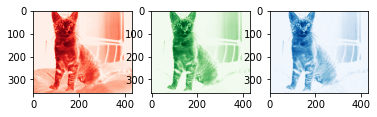

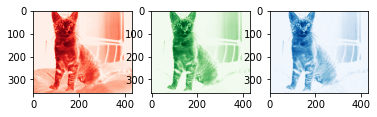

In [5]:
show_rgb_layers(img_to_array(load_img(full_images[5])))

Training photos are in different sizes, so we have to convert them all to the same size. Moreover, to save time on training we will reduce the photos to the size of 100 by 100 pixels - we use 'target size' argument here! Later we will load images using 'resize' argument with load_images

Zdjęcia treningowe są w różnych rozmiarach, więc musimy je wszystkie przekonwertować do tego samego rozmiaru.
Ponadto, aby zaoszczędzić czas na treningu, zmniejszymy zdjęcia do rozmiaru 100 na 100 pikseli.

Text(0.5, 1.0, 'cat.9980.jpg')

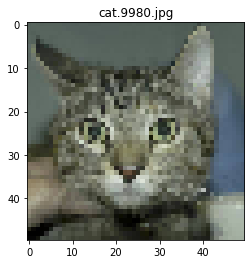

In [53]:


image_index = 12479
img = load_img(full_images[image_index], target_size=(50, 50))
plt.imshow(img)
plt.title(images[image_index])

In [72]:
#We will load 10000 images, 5000 each per category (training on all would take too long).
#Załadujemy 10000 zdjęć, po 5000 na każdą kategorię (trening na wszystkich zająłby zbyt dużo czasu).

import sys, os
sys.path.append(r'C:\Users\sofia\Desktop\Python')
from imports_for_ML import load_images

X, y = load_images(img_dir, n_images=15000, resize=(100, 100))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************


In [73]:
X.shape

(15000, 100, 100, 3)

In [74]:
#Importing

from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Conv2D, MaxPooling2D, Flatten

from keras.models import load_model

from keras.layers import Dropout, BatchNormalization

In [75]:
#After loading, we divide the photos into training and test photos.
#Po załadowaniu dzielimy zdjęcia na treningowe i testowe.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
X_train.shape

(12000, 100, 100, 3)

In [77]:
y_train.shape

(12000,)

To make the work easier I will separate 4% of the training data into an independent validation set - on this set of pictures we do not teach the network, but use it on an ongoing basis to monitor the correctness of the network on independent data during the training.

Aby ułatwić pracę wydzielimy 4% danych treningowych do niezależnego zbioru walidacyjnego - na tym zbiorze zdjęć nie uczymy sieci, ale używamy jej na bieżąco do monitorowania poprawności działania sieci na niezależnych danych w trakcie treningu.

In [78]:


from keras.callbacks import EarlyStopping

stop_early = EarlyStopping(patience=3)

My network will consist of: five hidden layers, four convolution layers and one 'dense' (all to all connection).
The first two convolution layers will consist of 64 filters, each 4 x 4 (plus depth) and 3 x 3. The activation function for these layers is standard relu. Then I will add BatchNormalization after each of convoluted layer (Conv2d). After each convolution layer I will perform a maximum pooling operation, dividing the image into segments. Then I add more convoluion layers consisting of 128 filter, each 3x3. Again I use max pooling. At the end, we roll out the previous layer into one vector (flatten) and add a normal layer with 512 neurons. The output layer is just one neuron (Dense type) that tells us whether or not there's a dog in the picture, with the sigmoid activation. Dropout prevents neurons or combinations of neurons from remembering specific training examples (and, therefore, overfitting).

Moja sieć będzie składała się z: pięciu warstw ukrytych, czterech warstw konwolucji i jednej "dense". Pierwsze dwie warstwy konwolucyjne będą składały się z 64 filtrów, każdy 4 x 4 (plus głębia) i 3 x 3. Funkcją aktywacji dla tych warstw jest standardowa relu. Następnie dodam BatchNormalization po każdej z warstw konwolucyjnych (Conv2d). Po każdej warstwie konwolucyjnej wykonam operację maximum pooling, dzieląc obraz na segmenty. Następnie dodaję kolejne warstwy konwolucyjne składające się z 128 filtrów, każdy 3x3. Ponownie stosuję max pooling. Na koniec zwijamy poprzednią warstwę w jeden wektor (flatten) i dodajemy normalną warstwę z 512 neuronami. Warstwa wyjściowa to tylko jeden neuron (typ Dense), który mówi nam, czy na obrazku jest pies, czy nie, z aktywacją sigmoidalną. Dropout zapobiega zapamiętywaniu przez neurony lub ich kombinacje konkretnych przykładów treningowych.


In [79]:


model = Sequential([


Conv2D(64, (4,4), activation='relu', input_shape=(100, 100, 3), kernel_initializer='he_uniform'),
BatchNormalization(),
MaxPooling2D(pool_size=(3, 3),  padding='same'),
Dropout(0.25), 
Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'),
MaxPooling2D(pool_size=(3, 3),  padding='same'),
Dropout(0.25),    
BatchNormalization(),
Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform'),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),
Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform'),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),
Flatten(),
Dense(512, activation='relu', kernel_initializer='he_uniform'),
Dense(1, activation='sigmoid')

])


model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [80]:
history = model.fit(  X_train, y_train, epochs=20, validation_split=0.04, callbacks=[stop_early]    )

Epoch 1/20
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x000001C2E1EDB430>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x000001C2E1EDB430>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Ori

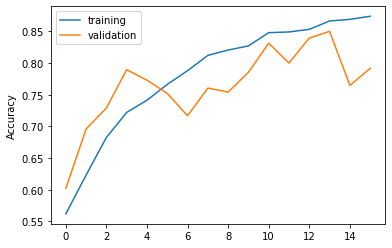

In [88]:
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.ylabel('Accuracy')
plt.legend()

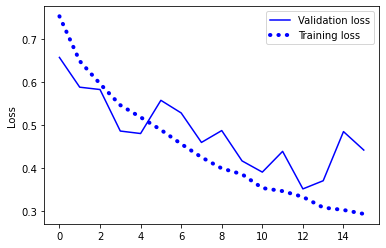

In [89]:
plt.plot(history.history['val_loss'], label='Validation loss', color='Blue')
plt.plot(history.history['loss'], label='Training loss', color='Blue', linestyle=(0, (0.1,2)), dash_capstyle='round', linewidth = 4)
plt.ylabel('Loss')
plt.legend()

[[0.03967884]]


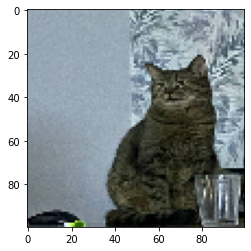

In [90]:
#Checking model on my own cat
my_image_dir = r'C:\Users\sofia\Downloads\photo.jpg'
my_image = load_img(my_image_dir, target_size=(100, 100))
test_my_image = img_to_array(my_image)
prediction = model.predict(test_my_image.reshape(1,100,100,3))
plt.imshow(my_image)
print(prediction)

[None, None]

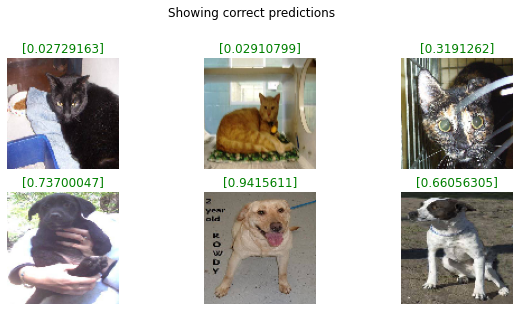

In [98]:
# code for displaying multiple images in one figure

#import libraries
fig = plt.figure(figsize=(10, 7))
fig.suptitle('Showing correct predictions')

# setting values to rows and column variables
rows = 3
columns = 3

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image

prediction_1 = model.predict((img_to_array(load_img(full_images[10654], target_size=(100,100)))).reshape(1,100,100,3))
plt.imshow(img_to_array(load_img(full_images[10564], target_size=(100,100)), dtype='uint8'))
plt.axis('off')
title_obj = plt.title("{percentage}".format(percentage=prediction_1[0]))
plt.setp(title_obj, color='green')  

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image

prediction_2 = model.predict((img_to_array(load_img(full_images[10653], target_size=(100,100)))).reshape(1,100,100,3))
plt.imshow(img_to_array(load_img(full_images[10563], target_size=(100,100)), dtype='uint8'))
plt.axis('off')
title_obj = plt.title("{percentage}".format(percentage=prediction_2[0]))
plt.setp(title_obj, color='green')  

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
prediction_3 = model.predict((img_to_array(load_img(full_images[10651], target_size=(100,100)))).reshape(1,100,100,3))
plt.imshow(img_to_array(load_img(full_images[10561], target_size=(100,100)), dtype='uint8'))
plt.axis('off')
title_obj = plt.title("{percentage}".format(percentage=prediction_3[0]))
plt.setp(title_obj, color='green')  

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
prediction_4 = model.predict((img_to_array(load_img(full_images[16651], target_size=(100,100)))).reshape(1,100,100,3))
plt.imshow(img_to_array(load_img(full_images[16561], target_size=(100,100)), dtype='uint8'))
plt.axis('off')
title_obj = plt.title("{percentage}".format(percentage=prediction_4[0]))
plt.setp(title_obj, color='green')  


fig.add_subplot(rows, columns, 5)

# showing image
prediction_5 = model.predict((img_to_array(load_img(full_images[16652], target_size=(100,100)))).reshape(1,100,100,3))
plt.imshow(img_to_array(load_img(full_images[16562], target_size=(100,100)), dtype='uint8'))
plt.axis('off')
title_obj = plt.title("{percentage}".format(percentage=prediction_5[0]))
plt.setp(title_obj, color='green')  
fig.add_subplot(rows, columns, 6)

# showing image
prediction_6 = model.predict((img_to_array(load_img(full_images[16653], target_size=(100,100)))).reshape(1,100,100,3))
plt.imshow(img_to_array(load_img(full_images[16563], target_size=(100,100)), dtype='uint8'))
plt.axis('off')
title_obj = plt.title("{percentage}".format(percentage=prediction_6[0]))
plt.setp(title_obj, color='green')  



[[0.01748243]]


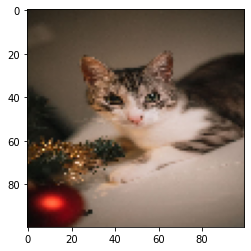

In [93]:
fr_image_dir = r'C:\Users\sofia\Downloads\or.jpg'
fr_image = load_img(fr_image_dir, target_size=(100, 100))
test_fr_image = img_to_array(fr_image)
prediction_fr = model.predict(test_fr_image.reshape(1,100,100,3))
plt.imshow(fr_image)
print(prediction_fr)

[[0.15022999]]


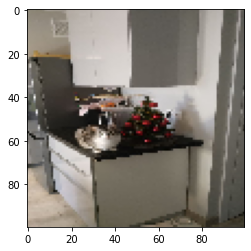

In [94]:
fr_image_dir_2 = r'C:\Users\sofia\Downloads\or2.jpg'
fr_image_2 = load_img(fr_image_dir_2, target_size=(100, 100))
test_fr_image_2 = img_to_array(fr_image_2)
prediction_fr_2 = model.predict(test_fr_image_2.reshape(1,100,100,3))
plt.imshow(fr_image_2)
print(prediction_fr_2)